In [1]:
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import imageio
from PIL import Image
import tensorflow as tf

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
!ls gdrive/MyDrive

 1620532806499.jpg
'2 CONSUMERS (INDIVIUAL) Arjun.gdoc'
'6th tests (1).gdoc'
'6th tests (2).gdoc'
'6th tests.gdoc'
'6th tests.pdf'
'750 Rs..pdf'
 Academy.pdf
'A Completen tas frases siguientes con la forma.pdf'
'Adobe Scan Aug 21, 2022.pdf'
'AFL Arjun Choudhary - Grade 6 - Measurement- July 10 (1).pdf'
'AFL Arjun Choudhary - Grade 6 - Measurement- July 10.pdf'
'AFL WS.pdf'
'After supper sly Wakala Asked a question of the women.gdoc'
 Alight.gdoc
'ALL MENUS:.gdoc'
'A mid summer.gslides'
 ammm.pdf
'Answers (1).gdoc'
 answers.gdoc
 Answers.gdoc
 area.pdf
'argumenttative essay things.gdoc'
'Arjun (1).pdf'
'arjun assignment 1 cw 1 76.pdf'
'Arjun - brown .gdoc'
'Arjun Choudary-Spanish'
'Arjun Choudhary'
'ARJUN CHOUDHARY.gdoc'
'Arjun Choudhary - Inquiry Journal 1 A [HW].pdf'
'Arjun Choudhary - Inquiry Journal 1 B.pdf'
'arjun Choudhary integer test.pdf'
'Arjun Choudhary - Subordinate courts review.gdoc'
'Arjun CHoudhary word provblems.pdf'
'Arjun Part.m4a'
 Arjun.pdf
'Arjun story.gdoc'
'Art we

In [4]:
!unzip /content/gdrive/MyDrive/data2/archive.zip

Archive:  /content/gdrive/MyDrive/data2/archive.zip
  inflating: data/test/infected/OIP.jpg  
  inflating: data/test/infected/R.jpg  
  inflating: data/test/infected/WhatsApp Image 2022-04-01 at 3.49.22 PM.jpeg  
  inflating: data/test/infected/WhatsApp Image 2022-04-01 at 3.49.45 PM.jpeg  
  inflating: data/test/infected/WhatsApp Image 2022-04-01 at 3.50.05 PM.jpeg  
  inflating: data/test/infected/WhatsApp Image 2022-04-01 at 3.50.20 PM.jpeg  
  inflating: data/test/infected/img1.jpg  
  inflating: data/test/infected/img10.jpg  
  inflating: data/test/infected/img2.jpg  
  inflating: data/test/infected/img3.jpg  
  inflating: data/test/infected/img4.jpg  
  inflating: data/test/infected/img5.jpg  
  inflating: data/test/infected/img6.jpg  
  inflating: data/test/infected/img7.jpg  
  inflating: data/test/infected/img8.jpg  
  inflating: data/test/infected/img_0_1023.jpg  
  inflating: data/test/infected/img_0_1033.jpg  
  inflating: data/test/infected/img_0_1071.jpg  
  inflating: da

In [6]:
import os

# Path to the folder containing images in your Google Drive
image_folder_path = '/content/data/train/infected'
os.chdir(image_folder_path)


In [7]:
from skimage import color


image_files = os.listdir()
infected_imgs = []
print(image_files)
for image_file in image_files:
    if image_file.endswith('.jpg'):
        image_path = os.path.join(image_folder_path, image_file)
        img = Image.open(image_path)
        gray_image = color.rgb2gray(img)
        infected_imgs.append(img)

['img_0_278.jpg', 'img_0_3002.jpg', 'img_0_4909.jpg', 'img_0_3757.jpg', 'img_0_4104.jpg', 'img_0_866.jpg', 'img_0_4257.jpg', 'img_0_3192.jpg', 'img_0_2500.jpg', 'img_0_2175.jpg', 'img_0_2389.jpg', 'img_0_7333.jpg', 'img_0_7123.jpg', 'img_0_2440.jpg', 'img_0_9744.jpg', 'img_0_6447.jpg', 'img_0_6399.jpg', 'img_0_209.jpg', 'img_0_7648.jpg', 'img_0_820.jpg', 'img_0_5518.jpg', 'img_0_1812.jpg', 'img_0_7929.jpg', 'img1.jpg', 'img_0_3260.jpg', 'img_0_6386.jpg', 'img_0_1373.jpg', 'img_0_3913.jpg', 'img_0_9499.jpg', 'img_0_3799.jpg', 'img_0_3943.jpg', 'img_0_8910.jpg', 'img_0_635.jpg', 'img_0_2743.jpg', 'img_0_5544.jpg', 'img_0_8304.jpg', 'img_0_5668.jpg', 'img_0_3592.jpg', 'img_0_2284.jpg', 'img_0_4969.jpg', 'img_0_1531.jpg', 'img_0_2179.jpg', 'img_0_553.jpg', 'img_0_2986.jpg', 'img_0_7091.jpg', 'img_0_4264.jpg', 'img_0_9115.jpg', 'img_0_3933.jpg', 'img_0_4014.jpg', 'img_0_1757.jpg', 'img_0_9935.jpg', 'img_0_3340.jpg', 'img_0_9985.jpg', 'img_0_5970.jpg', 'img_0_155.jpg', 'img_0_7207.jpg', 'img

In [8]:
np.shape(infected_imgs)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  result = asarray(a).shape
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(781,)

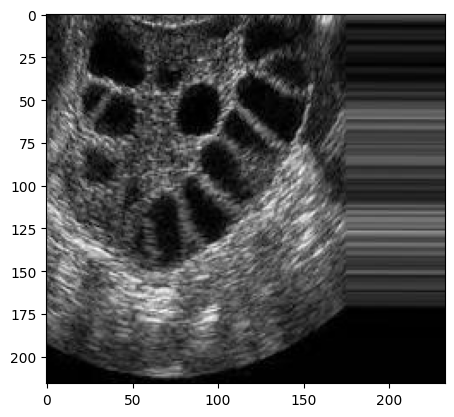

In [9]:
plt.imshow(infected_imgs[20], cmap = 'gray')

In [10]:
gray_infected_data = []
for img in infected_imgs:
   gray_infected_data.append(color.rgb2gray(img))
gray_infected_data = np.array(gray_infected_data)

<ipython-input-10-61fac185561b>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  gray_infected_data = np.array(gray_infected_data)


In [11]:
def normalize_one_image(image):

  return (image - np.min(image)) / (np.max(image) - np.min(image))

In [12]:
normalized_gray_infected_data = []
for img in gray_infected_data:
   normalized_gray_infected_data.append(normalize_one_image(img))
normalized_gray_infected_data = np.array(normalized_gray_infected_data)

<ipython-input-12-6c6a1749c7a0>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  normalized_gray_infected_data = np.array(normalized_gray_infected_data)


In [13]:
np.shape(normalized_gray_infected_data)

(781,)

In [55]:
datagen = ImageDataGenerator(width_shift_range=[-50,50])
image = normalized_gray_infected_data[2:4]

# expand dimension to one sample
samples = np.expand_dims(np.expand_dims(image, axis=-1), 0)
# create an iterator
it = datagen.flow(samples, batch_size=2)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):
    # convert to unsigned integers
    batch = next(it)
    img = batch[0].astype('uint8').squeeze()
    # plot image
    print(img)

ValueError: ignored

In [21]:
infected_preprocess = []
noninfected_preprocess = []

In [38]:
img_height = img_width = 224
batch_size = 781
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/data/train',


    shuffle=True,
    seed=12,
    validation_split= 0.2,
    subset="training",
    color_mode = 'grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1924 files belonging to 2 classes.
Using 1540 files for training.


In [41]:
one_hot_labels = []
class_names =train_ds.class_names
print(class_names)
labels = ['infected', 'notinfected']
for label in class_names:
  new_label = np.zeros(2)
  new_label[labels.index(label)] = 1
  one_hot_labels.append(new_label)


print(one_hot_labels)

['infected', 'notinfected']
[array([1., 0.]), array([0., 1.])]


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = normalized_gray_infected_data() , y =one_hot_labels()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


SyntaxError: ignored